### Import statements en versie beheer


In [18]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
print(pd.__version__)


3.0.0


## DebatePolitics Analyse

In [19]:
df = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/dp-set2-sentiment-labeld.jsonl.gz', orient='records', lines=True, compression='gzip')
df.head()

,source,scraped_at,media,keywords_hit,thread.url,thread.title,thread.page_url,thread.page_num,post.id,post.author,post.created_at,content.text,content.html,entities.links,sentiment,confidence
0,debatepolitics,2026-01-28 11:19:57.132,[],[ice agent],https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,1,1082530876,Dans La Lune,2026-01-10T11:22:10-0500,redbeer said: As I said the citizens moved aro...,"<div class=""bbWrapper""><blockquote class=""bbCo...",[{'url': 'https://debatepolitics.com/goto/post...,Very Negative,0.518885
1,debatepolitics,2026-01-28 11:19:57.132,"[{'type': 'image', 'url': 'https://static01.ny...","[ice shooting, ice agent]",https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,1,1082531359,trixare4kids,2026-01-10T12:30:39-0500,Dans La Lune said: Abolish ICE. Click to expan...,"<div class=""bbWrapper""><blockquote class=""bbCo...",[{'url': 'https://debatepolitics.com/goto/post...,Neutral,0.942883
2,debatepolitics,2026-01-28 11:19:58.890,[],[ice agent],https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,2,1082537432,Phys251,2026-01-11T15:39:50-0500,I've said that we may need to abolish ICE. Tha...,"<div class=""bbWrapper"">I've said that we may n...",[],Negative,0.824640
3,debatepolitics,2026-01-28 11:19:58.890,[],[ice agent],https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,2,1082537436,reinaert,2026-01-11T15:42:10-0500,Phys251 said: I've said that we may need to ab...,"<div class=""bbWrapper""><blockquote class=""bbCo...",[{'url': 'https://debatepolitics.com/goto/post...,Neutral,0.543899
4,debatepolitics,2026-01-28 11:19:58.890,[],"[ice agent, ice officer]",https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,2,1082537452,Jason Warfield,2026-01-11T15:47:31-0500,antiquity said: The only people I see violatin...,"<div class=""bbWrapper""><blockquote class=""bbCo...",[{'url': 'https://debatepolitics.com/goto/post...,Negative,0.447961


In [20]:
df['sentiment'].value_counts()

sentiment
Neutral          2033
Negative         1883
Very Negative     540
Positive           97
Very Positive      33
Name: count, dtype: int64

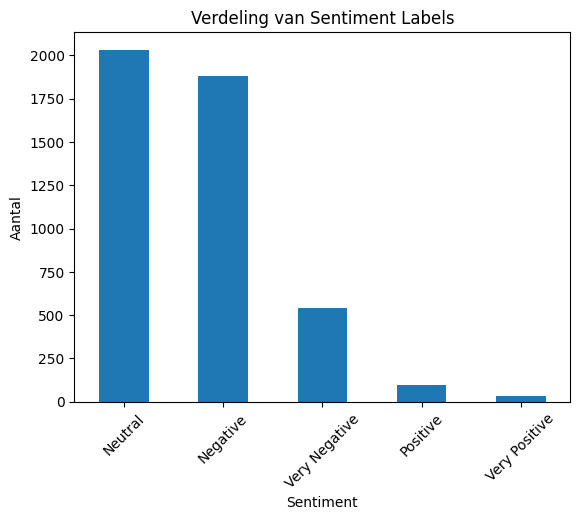

In [21]:


sentiment_counts = df["sentiment"].value_counts()

sentiment_counts.plot(kind="bar")
plt.title("Verdeling van Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Aantal")
plt.xticks(rotation=45)
plt.show()

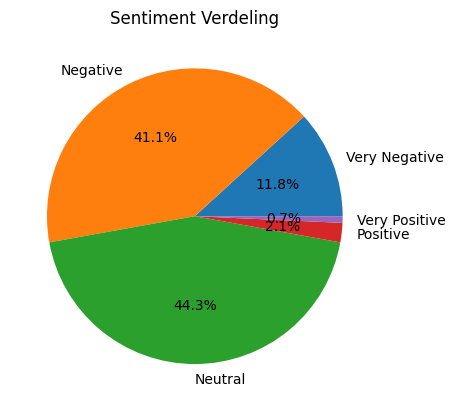

In [22]:


order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()


## Youtube Analyse

In [ ]:
df1 = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/yt-results-uniq-sentiment-labeld.jsonl', lines=True)
df2 = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/yt-results-archive-sentiment-labeld.jsonl', lines=True)
df1.head()

,video_id,video_url,scraped_at,title,description,channel_title,published_at,views,likes,comment_count,duration_seconds,keyword_relevance,_iteration,_archived_at,sentiment,confidence
0,tvBXacseqvo,https://www.youtube.com/watch?v=tvBXacseqvo,2026-02-10 09:26:13.243,Police chief reacts to video of ICE dragging w...,"“It pisses me off to see that, to see men doin...",60 Minutes,2026-01-19 18:38:55,117070,2654,486,144,"{'must_hits': ['ice'], 'should_hits': ['office...",1,2026-02-10 13:30:02.397,Negative,0.487049
1,1NzKGtHhGUI,https://www.youtube.com/watch?v=1NzKGtHhGUI,2026-02-10 09:28:32.326,ICE protests push back against local immigrati...,Protesters gathered in Highland Parl after rec...,NBCLA,2026-01-19 19:03:26,9197,69,111,109,"{'must_hits': ['ice'], 'should_hits': ['raid',...",1,2026-02-10 13:30:02.397,Neutral,0.938385
2,rC03XPvcy9M,https://www.youtube.com/watch?v=rC03XPvcy9M,2026-02-03 08:39:07.315,Minnesota residents push back against ICE immi...,In Minnesota's Twin Cities of Minneapolis and ...,DW News,2026-01-24 11:05:02,129893,1617,465,597,"{'must_hits': ['ice'], 'should_hits': ['raid',...",5,2026-02-05 10:08:52.569,Neutral,0.930375
3,MWw76aQHHR0,https://www.youtube.com/watch?v=MWw76aQHHR0,2026-01-27 09:00:20.138,Vance Says ICE Agents Not Racially Profiling i...,Vice President JD Vance argued that tensions i...,Bloomberg News,2026-01-23 16:00:36,30618,216,147,27,"{'must_hits': ['ice'], 'should_hits': ['deport...",4,2026-02-03 09:33:04.291,Neutral,0.864305
4,cBAoh1q_5u8,https://www.youtube.com/watch?v=cBAoh1q_5u8,2026-02-03 08:39:36.917,Shots fired during immigration raid after susp...,It comes just two weeks after the deadly ICE s...,ABC News,2026-01-22 01:14:49,47990,241,395,129,"{'must_hits': ['ice'], 'should_hits': ['raid',...",5,2026-02-05 10:08:52.569,Neutral,0.919554


In [26]:

df2.head()

,video_id,video_url,scraped_at,title,description,channel_title,published_at,views,likes,comment_count,duration_seconds,keyword_relevance,_iteration,_archived_at,sentiment,confidence
0,tvBXacseqvo,https://www.youtube.com/watch?v=tvBXacseqvo,2026-01-26 10:20:50.369,Police chief reacts to video of ICE dragging w...,"“It pisses me off to see that, to see men doin...",60 Minutes,2026-01-19 18:38:55,110767,2229,405,144,"{'must_hits': ['ice'], 'should_hits': ['enforc...",1,2026-01-26 11:36:36.480,Negative,0.487049
1,1NzKGtHhGUI,https://www.youtube.com/watch?v=1NzKGtHhGUI,2026-01-26 10:20:51.484,ICE protests push back against local immigrati...,Protesters gathered in Highland Parl after rec...,NBCLA,2026-01-19 19:03:26,7846,67,108,109,"{'must_hits': ['ice', 'immigration'], 'should_...",1,2026-01-26 11:36:36.480,Neutral,0.938385
2,rC03XPvcy9M,https://www.youtube.com/watch?v=rC03XPvcy9M,2026-01-26 10:20:52.609,Minnesota residents push back against ICE immi...,In Minnesota's Twin Cities of Minneapolis and ...,DW News,2026-01-24 11:05:02,100812,1417,453,597,"{'must_hits': ['ice', 'immigration'], 'should_...",1,2026-01-26 11:36:36.480,Neutral,0.930375
3,MWw76aQHHR0,https://www.youtube.com/watch?v=MWw76aQHHR0,2026-01-26 10:20:53.747,Vance Says ICE Agents Not Racially Profiling i...,Vice President JD Vance argued that tensions i...,Bloomberg News,2026-01-23 16:00:36,28465,197,141,27,"{'must_hits': ['ice', 'immigration'], 'should_...",1,2026-01-26 11:36:36.480,Neutral,0.864305
4,cBAoh1q_5u8,https://www.youtube.com/watch?v=cBAoh1q_5u8,2026-01-26 10:20:54.896,Shots fired during immigration raid after susp...,It comes just two weeks after the deadly ICE s...,ABC News,2026-01-22 01:14:49,47824,241,394,129,"{'must_hits': ['ice', 'immigration'], 'should_...",1,2026-01-26 11:36:36.480,Neutral,0.919554


In [ ]:
df1['sentiment'].value_counts()
df2['sentiment'].value_counts()


sentiment
Neutral          31766
Negative         22982
Very Negative    13873
Positive          9539
Very Positive     7760
Name: count, dtype: int64

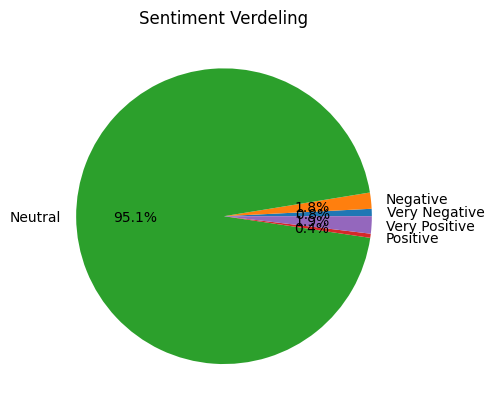

In [28]:
order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df1["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()


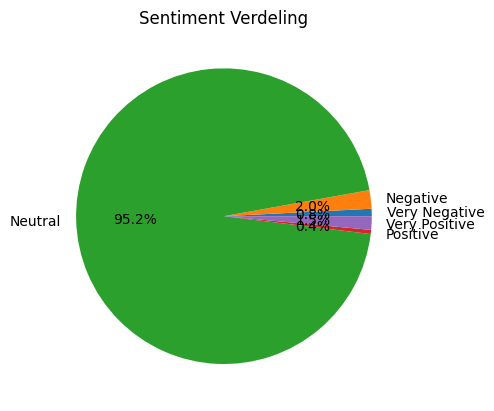

In [29]:
order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df2["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()


### Youtube comments

In [43]:
df_yt_comment = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/yt_comments_sentiment-labeld.json', lines=True)
df_yt_comment['sentiment'].value_counts()


sentiment
Neutral          31766
Negative         22982
Very Negative    13873
Positive          9539
Very Positive     7760
Name: count, dtype: int64

In [47]:
df_yt_comment['confidence'].describe()

count    85920.000000
mean         0.611675
std          0.174286
min          0.212641
25%          0.470251
50%          0.602924
75%          0.757249
max          0.945356
Name: confidence, dtype: float64

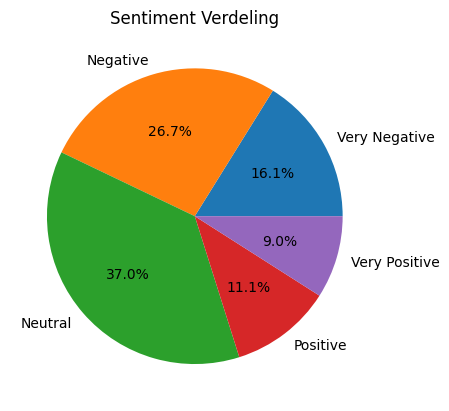

In [48]:
order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df_yt_comment["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()


## Bluesky Analyse


In [49]:
df3 = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/bs-posts2-sentiment-labeld.jsonl.gz', orient='records', lines=True, compression='gzip')
df3['sentiment'].value_counts()

sentiment
Neutral          140353
Negative          45864
Very Negative     37778
Very Positive     10593
Positive           8530
Name: count, dtype: int64

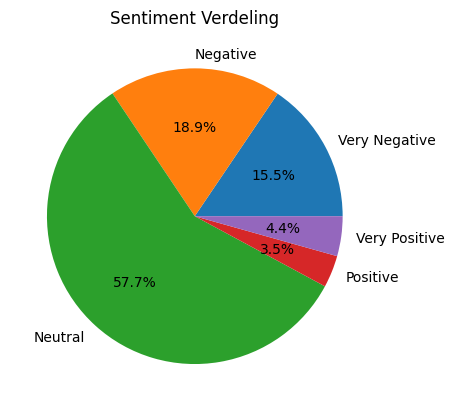

In [50]:
order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df3["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()

## Reddit


df4 = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/reddit-file', orient='records', lines=True, compression='gzip') 

df4['sentiment'].value_counts()
